In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#define dados
ticker = "OXY"

#salva os dados em um df e define periodo
df_data = yf.download(ticker, period="2500d")

[*********************100%***********************]  1 of 1 completed


In [4]:
df_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-23,77.488007,79.087967,77.095200,78.264038,56.027462,5725833
2013-04-24,78.426910,81.013672,78.426910,80.793320,57.838116,7712345
2013-04-25,80.084351,84.232758,79.087967,81.962158,58.674854,9961366
2013-04-26,81.818443,83.284279,80.965775,83.025604,59.436161,5896699
2013-04-29,83.705826,84.347725,82.393280,84.175278,60.259186,9771399


In [5]:
df_data["Day"] = pd.to_datetime(df_data.index).strftime("%d")
df_data["Year/Mounth"] = pd.to_datetime(df_data.index).strftime("%y-%m")
df_data["Year"] = pd.to_datetime(df_data.index).strftime("%y")

In [6]:
df_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Day,Year/Mounth,Year
Date,,,,,,,,,
2023-03-21,59.930000,60.750000,59.500000,60.240002,60.240002,16959100,21,23-03,23
2023-03-22,60.290001,60.419998,58.610001,58.680000,58.680000,13936200,22,23-03,23
2023-03-23,59.049999,59.560001,57.689999,58.480000,58.480000,15059300,23,23-03,23
2023-03-24,57.880001,58.599998,57.029999,58.180000,58.180000,13598000,24,23-03,23
2023-03-27,58.700001,59.860001,58.029999,59.650002,59.650002,13496172,27,23-03,23


In [36]:
df_day = df_data[df_data.index.isin(df_data.resample("MS").first().index)]
df_day = df_day.drop(['Open', 'High', 'Low', 'Close', 'Adj Close'], axis=1)
df_day['Year'].unique()

array(['13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype=object)

In [37]:
color_dict = {
    '13':'green', '14': 'red', '15':'blue', '16': 'cyan',
    '17':'green', '18': 'red', '19':'blue', '20': 'cyan',
    '21':'green', '22': 'red', '23':'blue'
}

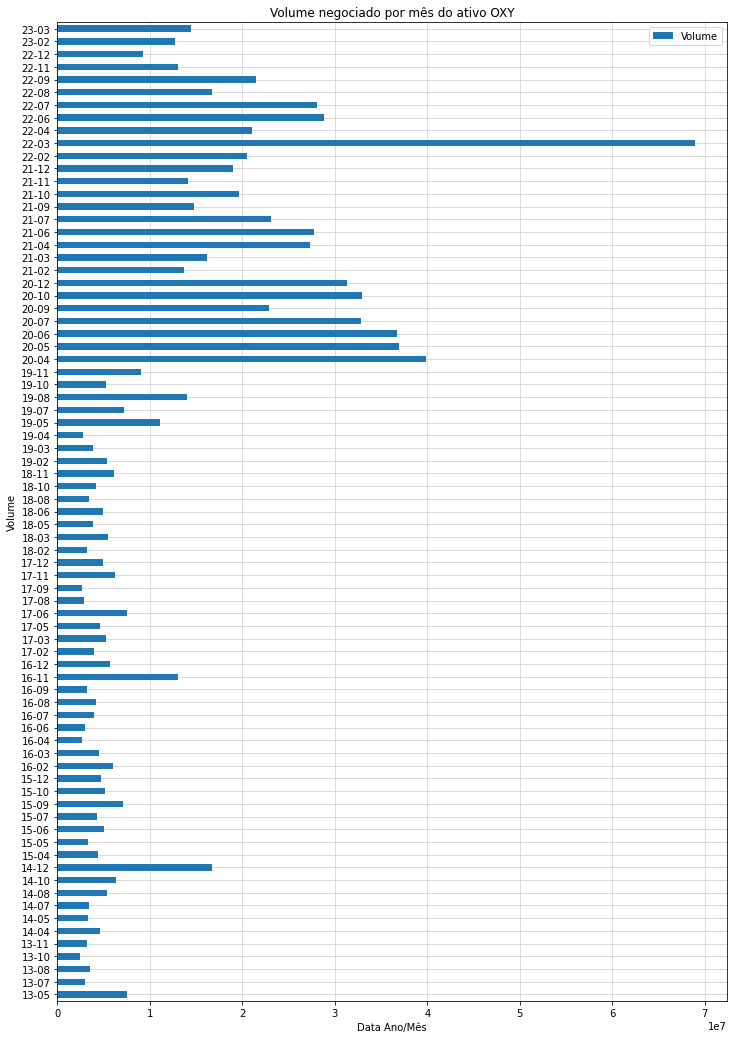

In [54]:
df_day.plot(kind="barh", figsize=(12, 18), x = 'Year/Mounth', y = 'Volume', zorder=2)
plt.title("Volume negociado por mês do ativo " + ticker)
plt.xlabel("Data Ano/Mês")
plt.ylabel("Volume")
plt.grid(zorder=0, color='lightgray')
plt.show()